# Method 2

## Population Estimation

Here we are going to develop population estimates using the 2011 Census and NTL for 2013. 
We will derive a non-linear equation between 2011 POP and 2013 NTL. 
Possible methods are a neural network or genetic algorithm.

We shall then apply our derived equation to newer NTL to get estimates of POPULATION. 
This shall be a verification exercise for our Method 1.

In [159]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport

In [160]:
Data2011 = pd.read_csv("RecreatePopulation/pop.ascii",delim_whitespace=" ",header=None)

features = ['LAT','LON','POP','NTL']

Data2011.columns=features

In [161]:
profilePOP2011 = ProfileReport(Data2011, title="2011")
profilePOP2011.to_file("Pop2011.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 294.92it/s]


# Neural Network based Regression
 
 Performed on log values first.

In [162]:
import math
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredError

In [163]:
Data2011_Log = Data2011[['LAT','LON']].copy()
none = [None]*6194
Data2011_Log['POP']=none
Data2011_Log['NTL']=none

In [164]:
for i in range(6194):
    for x in ['POP','NTL']:
        Data2011_Log[x].loc[i] = math.log10(Data2011[x].loc[i])

/Applications/anaconda3/envs/ML_env/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [165]:
ntltrain, ntltest, poptrain, poptest = train_test_split(Data2011_Log['NTL'],Data2011_Log['POP'], test_size=0.3, random_state=0, shuffle=True)

In [166]:
hidden_units2 = 200
hidden_units3 = 100
learning_rate = 0.01

def build_model_using_sequential():
  model = Sequential([
    Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])
  return model

model = build_model_using_sequential()

In [167]:
ntltrain = np.asarray(ntltrain).astype('float64')
poptrain = np.asarray(poptrain).astype('float64')

In [168]:
mse = MeanSquaredError()
model.compile(
    loss=mse, 
    optimizer=Adam(learning_rate=learning_rate), 
    metrics=[mse])

history = model.fit(
    ntltrain, 
    poptrain, 
    epochs=100, 
    batch_size=32,
    validation_split=0.1
)

Train on 3901 samples, validate on 434 samples
Epoch 1/100
3901/3901 [==============================] - 2s 411us/sample - loss: 0.4433 - mean_squared_error: 0.4430 - val_loss: 0.1454 - val_mean_squared_error: 0.1427
Epoch 2/100
3901/3901 [==============================] - 0s 121us/sample - loss: 0.1452 - mean_squared_error: 0.1451 - val_loss: 0.1593 - val_mean_squared_error: 0.1562
Epoch 3/100
3901/3901 [==============================] - 0s 124us/sample - loss: 0.1407 - mean_squared_error: 0.1406 - val_loss: 0.1551 - val_mean_squared_error: 0.1528
Epoch 4/100
3901/3901 [==============================] - 0s 121us/sample - loss: 0.1496 - mean_squared_error: 0.1496 - val_loss: 0.1519 - val_mean_squared_error: 0.1496
Epoch 5/100
3901/3901 [==============================] - 0s 120us/sample - loss: 0.1497 - mean_squared_error: 0.1497 - val_loss: 0.1346 - val_mean_squared_error: 0.1320
Epoch 6/100
3901/3901 [==============================] - 0s 121us/sample - loss: 0.1374 - mean_squared_error

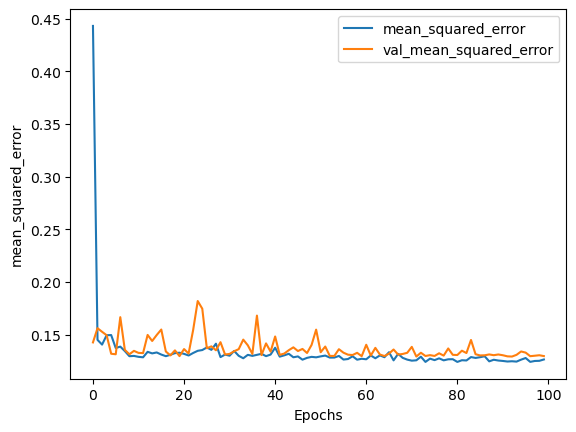

In [169]:
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
plot_history(history, 'mean_squared_error')

In [170]:
poppred = model.predict(ntltest)

In [171]:
poptest = np.asarray(poptest).astype('float32')

In [172]:
for i in range(1859):
    poppred[i][0] = 10**poppred[i][0]
    poptest[i] = 10**poptest[i]

# Simple Regression

Also on log scale.

In [173]:
from sklearn.linear_model import LinearRegression
ntl = Data2011_Log['NTL'].to_numpy().reshape((-1,1))
pop = Data2011_Log['POP'].to_numpy()

In [174]:
model = LinearRegression()
model.fit(ntl, pop)
r_sq = model.score(ntl, pop)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

coefficient of determination: 0.5150046885217723
intercept: 2.3567428418925505
slope: [0.67908242]
